## Laboratorio I - Femicidios - Grupo 12: Clerici, Pérez

# Laboratorio I



In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')

/home/pap/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Estadísticas oficiales de femicidio

**por qué elegimos el dataset de femicidios?**

In [2]:
# Cargar dataset
dataset = pd.read_csv('http://datos.jus.gob.ar/dataset/27bb9b2c-521b-406c-bdf9-98110ef73f34/resource/a2e1c899-cbaa-4bf6-b623-6648f150cab0/download/registro-de-femicidios-2018-04-13.csv', 
                      encoding='utf8')
# quitar tilde de nombre de columna número
dataset.loc[:,'numero'] = dataset[u'número']
#elimino la columna que queda con 'número' con tilde
dataset = dataset.drop('número', axis=1)
dataset.head(5)

,edad,identidad_genero,tipo_victima,lugar_hecho,modalidad_comisiva,fecha_hecho,numero
0,8,MUJER,VINCULADO,Buenos Aires,QUEMADURAS -,2018-04-06,1108
1,11,MUJER,VINCULADO,Buenos Aires,QUEMADURAS -,2018-04-06,1108
2,31,MUJER,PRINCIPAL,Buenos Aires,QUEMADURAS -,2018-04-06,1108
3,22,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO -,2018-04-15,1107
4,18,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO -,2018-04-15,1107


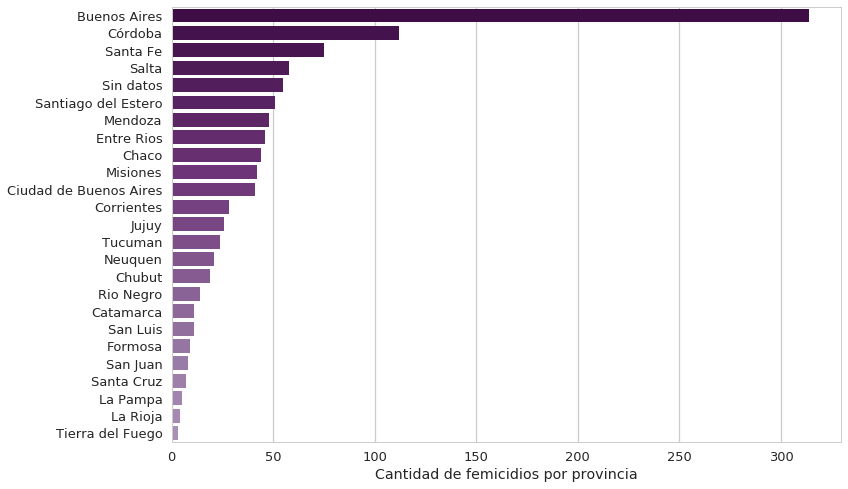

In [3]:
fig = plt.figure(figsize=(12,8))
# graficar violencia por provincia
ax = sns.countplot(data=dataset, y='lugar_hecho', 
                   palette=sns.color_palette("PRGn", 100), 
                   order=dataset['lugar_hecho'].value_counts().index
                  )
ax.set_ylabel('')
ax.set_xlabel('Cantidad de femicidios por provincia')
plt.show()

El gráfico anterior no es representativo de las muertes por violencia de género de cada provincia, o no es 'justo', ya que una provincia como Buenos Aires puede ser mostrada como la más violenta hacia las mujeres si no se considera su población. Una forma de mostrar esto correctamente es pesar la cantidad de femicidios por cantidad de habitantes, lo que dará una idea de *densidad* de femicidios por provincia.

Buscamos los datos del Censo 2010 porque nos interesa pesar la cantidad de femicidios por cantidad de habitantes.
Los datos son obtenidos de https://www.sig.indec.gov.ar/censo2010/ y se encuentran en el archivo `numero-habitantes-provincia-censo2010.txt`.

In [4]:
censo2010 = pd.read_csv('numero-habitantes-provincia-censo2010.csv')
censo2010 = censo2010[['provincia', 'numero_habitantes']]
censo2010.head(4)

,provincia,numero_habitantes
0,Ciudad de Buenos Aires,2890151
1,Tucuman,1448188
2,Buenos Aires,15625084
3,Misiones,1101593


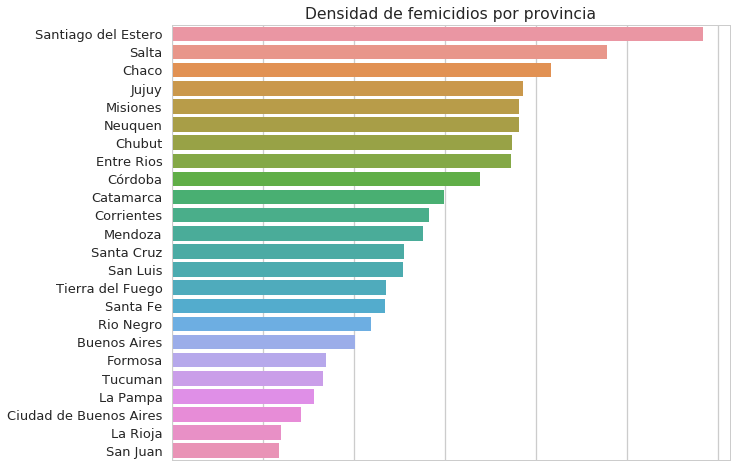

In [5]:
# femicidios por provincia
ds = dataset['lugar_hecho'].value_counts()
# habitantes por provincia
cs = pd.Series(censo2010['numero_habitantes'].get_values(), index=censo2010['provincia'])
fem_x_hab = ds.div(cs)
# sacamos los datos donde no se especifica pronvincia del hecho
fem_x_hab = fem_x_hab.dropna().sort_values(ascending=False)
fig2 = plt.figure(figsize=(10,8))
ax1 = sns.barplot(x=fem_x_hab.get_values(), y=fem_x_hab.index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Densidad de femicidios por provincia')
plt.show()

**ACÁ MEJOR MOSTRARLO CON UN MAPA DE LA ARGENTINA USANDO Choropleth Map**

# Datos a buscar para realizar comparaciones

* PBI por provincia
* Porcentaje de personas en situación de pobreza e indigencia
* Inversión en seguridad
* Inversión en educación
* Inversión en políticas de género e inclusión

***Ahora veremos la distribución de edad de las victimas mujeres***

La media es: 32.61431870669746
La mediana: 30.0
Y la moda: 0    22.0
dtype: float64



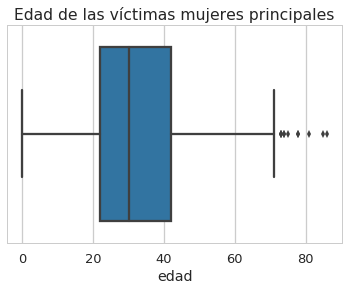

In [93]:
#sacamos la edad de mujeres principales
edad_mujer_p = dataset.where((dataset['identidad_genero']=='MUJER') & 
                           (dataset['edad']!="Sin datos") & (dataset["tipo_victima"]=='PRINCIPAL'))
edad_mujer_p = edad_mujer_p.dropna()['edad'].apply(float)

#hay un dato mal cargado que dice que hay una mujer de 999 años
edad_mujer_p = edad_mujer_p.where(edad_mujer < 200.0)
print("La media es: {}\nLa mediana: {}\nY la moda: {}\n".format(str(edad_mujer_p.mean()),str(edad_mujer_p.median())
                                                                    , str(edad_mujer_p.mode())))
principal = sns.boxplot(edad_mujer_p)
principal.set_title("Edad de las víctimas mujeres principales")
plt.show()


La media es: 27.865384615384617
La mediana: 19.0
Y la moda: 0    11.0
1    19.0
dtype: float64



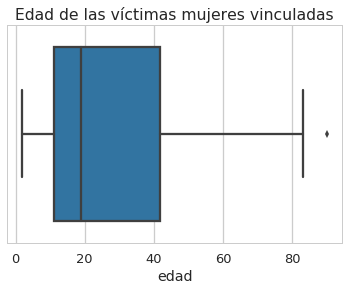

In [96]:
#sacamos la edad de mujeres vinculadas
edad_mujer_v = dataset.where((dataset['identidad_genero']=='MUJER') & 
                           (dataset['edad']!="Sin datos") & (dataset["tipo_victima"]=='VINCULADO'))
edad_mujer_v = edad_mujer_v.dropna()['edad'].apply(float)

#hay un dato mal cargado que dice que hay una mujer de 999 años
edad_mujer_v = edad_mujer_v.where(edad_mujer < 200.0)
print("La media es: {}\nLa mediana: {}\nY la moda: {}\n".format(str(edad_mujer_v.mean()),str(edad_mujer_v.median())
                                                                    , str(edad_mujer_v.mode())))
principal = sns.boxplot(edad_mujer_v)
principal.set_title("Edad de las víctimas mujeres vinculadas")
plt.show()

In [90]:
#sacamos la edad de solo las mujeres principales y vinculadas
edad_mujer = dataset.where((dataset['identidad_genero']=='MUJER') & (dataset['edad']!="Sin datos"))
edad_mujer = edad_mujer.dropna()['edad'].apply(float)

#hay un dato mal cargado que dice que hay una mujer de 999 años
edad_mujer = edad_mujer.where(edad_mujer < 200.0)

La media es: 32.34531590413943
La mediana: 30.0
Y la moda: 0    22.0
dtype: float64



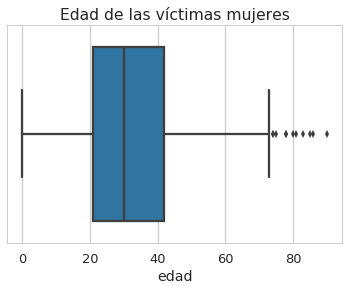

In [7]:
print("La media es: {}\nLa mediana: {}\nY la moda: {}\n".format(str(edad_mujer.mean()),str(edad_mujer.median())
                                                                    , str(edad_mujer.mode())))
total = sns.boxplot(edad_mujer)
total.set_title("Edad de las víctimas mujeres principales y vinculadas")
plt.show()

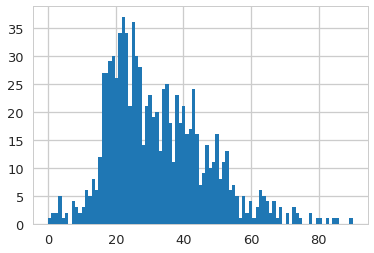

In [8]:
ax3=edad_mujer.hist(bins=91)



In [89]:
cant_mujeres = edad_mujer.count()
def pmf(x,serie):
    sum = 0
    for i in serie:
        if i == x:
            sum =  sum + 1
    sum = sum/(serie.dropna().size)
    return sum

def cmf(x,serie):
    sum = 0
    for i in serie.drop_duplicates():
        if i<=x:
            sum = sum + pmf(i,serie)
    return sum




**Ahora la distribución de las víctimas hombres(vinculadas)**

In [10]:
#sacamos la edad de solo los hombres
edad_hombre = dataset.where((dataset['identidad_genero'] == 'HOMBRE')&(dataset['edad']!="Sin datos"))
edad_hombre = edad_hombre.dropna()['edad'].apply(float)
edad_hombre.describe()

count    35.000000
mean     21.571429
std      19.315166
min       0.000000
25%       5.000000
50%      20.000000
75%      32.000000
max      70.000000
Name: edad, dtype: float64

La media es: 21.571428571428573
La mediana: 20.0
Y la moda: 0    3.0
1    4.0
2    7.0
dtype: float64



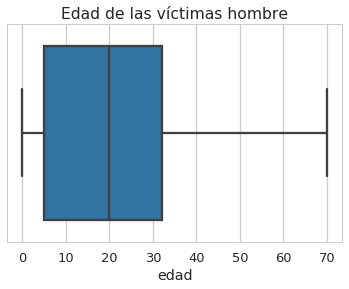

In [11]:
print("La media es: {}\nLa mediana: {}\nY la moda: {}\n".format(str(edad_hombre.mean()),str(edad_hombre.median())
                                                                    , str(edad_hombre.mode())))
hombre_box = sns.boxplot(edad_hombre)
hombre_box.set_title("Edad de las víctimas hombre")
plt.show()

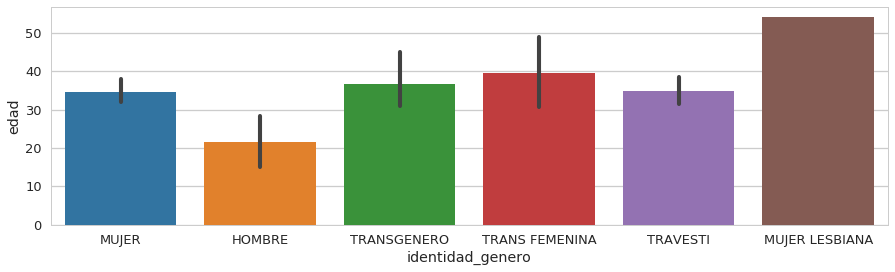

In [12]:
fig = plt.figure(figsize=(15,4))
edad_muertxs = dataset.where((dataset['identidad_genero'] != 'Sin datos')&(dataset['edad'] != 'Sin datos'))
sns.barplot(x = 'identidad_genero', y = edad_muertxs.edad.dropna().apply(float), data = edad_muertxs)

Text(0.5,1,'Escala logarítmica')

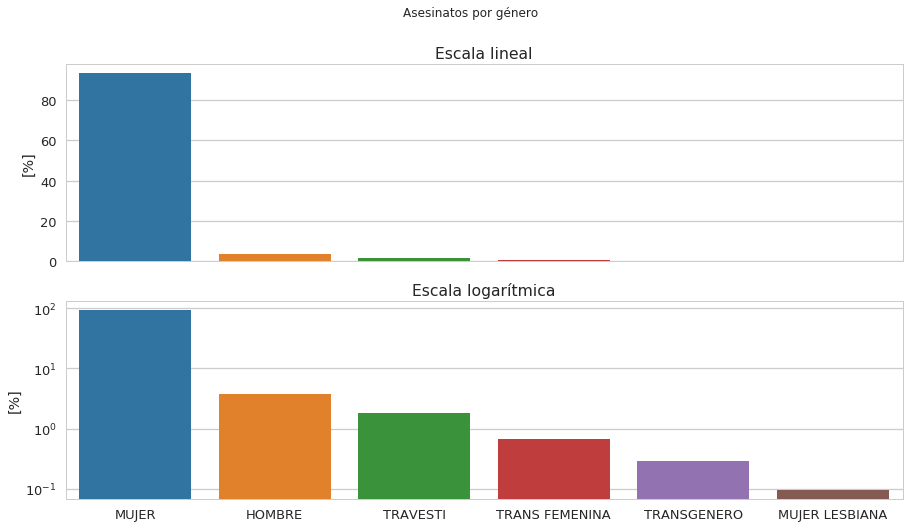

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,8) ,sharex=True)

sns.barplot(x= dataset['identidad_genero'].where(dataset['identidad_genero'] != 'Sin datos').value_counts().index,
            y=100*dataset['identidad_genero'].where(dataset['identidad_genero'] != 'Sin datos').value_counts(normalize=True), 
            data=dataset,
            ax = ax1)
sns.barplot(x= dataset['identidad_genero'].where(dataset['identidad_genero'] != 'Sin datos').value_counts().index,
            y=100*dataset['identidad_genero'].where(dataset['identidad_genero'] != 'Sin datos').value_counts(normalize=True), 
            data=dataset,
            ax = ax2)

ax2.set_yscale('log')
ax1.set_ylabel('[%]')
ax2.set_ylabel('[%]')
fig.suptitle('Asesinatos por género')
ax1.set_title('Escala lineal')
ax2.set_title('Escala logarítmica')

**Explicar porqué conviene mostrar en escala logarítmica**

In [14]:
def yeartoint(fecha):
    if (fecha != 'Sin datos'):
        return int(fecha.split('-')[0])
    else:
        return np.nan

def monthtoint(fecha):
    if (fecha != 'Sin datos'):
        return int(fecha.split('-')[1])
    else:
        return np.nan

In [15]:
fecha_anio = dataset['fecha_hecho'].apply(yeartoint)
fecha_mes = dataset['fecha_hecho'].apply(monthtoint)
fecha_anio_principal = dataset.where((dataset['tipo_victima'] == 'PRINCIPAL')).dropna()['fecha_hecho'].apply(yeartoint)
fecha_mes_principal = dataset.where(dataset['tipo_victima'] == 'PRINCIPAL').dropna()['fecha_hecho'].apply(monthtoint)

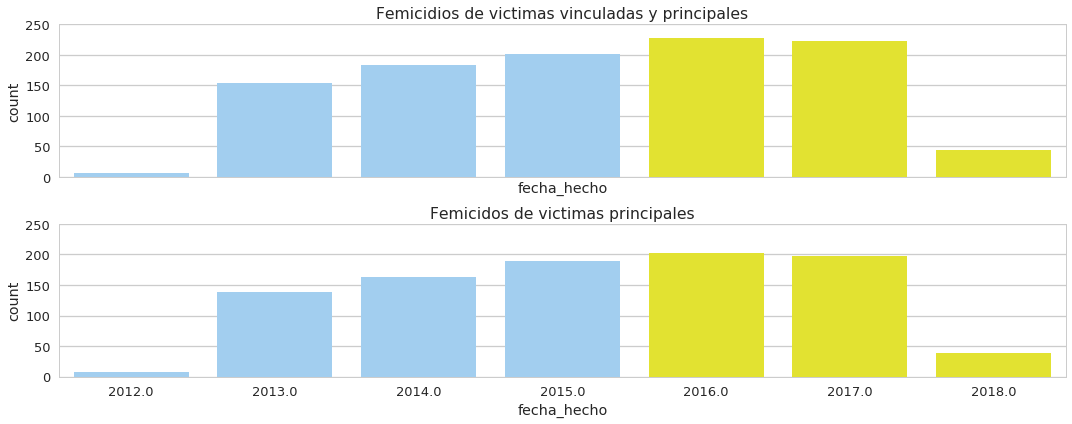

In [311]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,6), sharex=True)
palette = sns.xkcd_palette(["light blue","light blue","light blue","light blue",
                             "yellow","yellow","yellow"])
sns.countplot(fecha_anio, ax=ax1, palette=palette)
sns.countplot(fecha_anio_principal, ax=ax2, palette=palette)
ax1.set_ylim(0, 250)
ax1.set_title("Femicidios de victimas vinculadas y principales")
ax2.set_title("Femicidos de victimas principales")
ax2.set_ylim(0, 250)
fig.tight_layout()

In [40]:
dataset_2 = dataset.copy()
dataset_2["fecha_hecho"]=dataset_2["fecha_hecho"].apply(yeartoint)

/home/pap/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


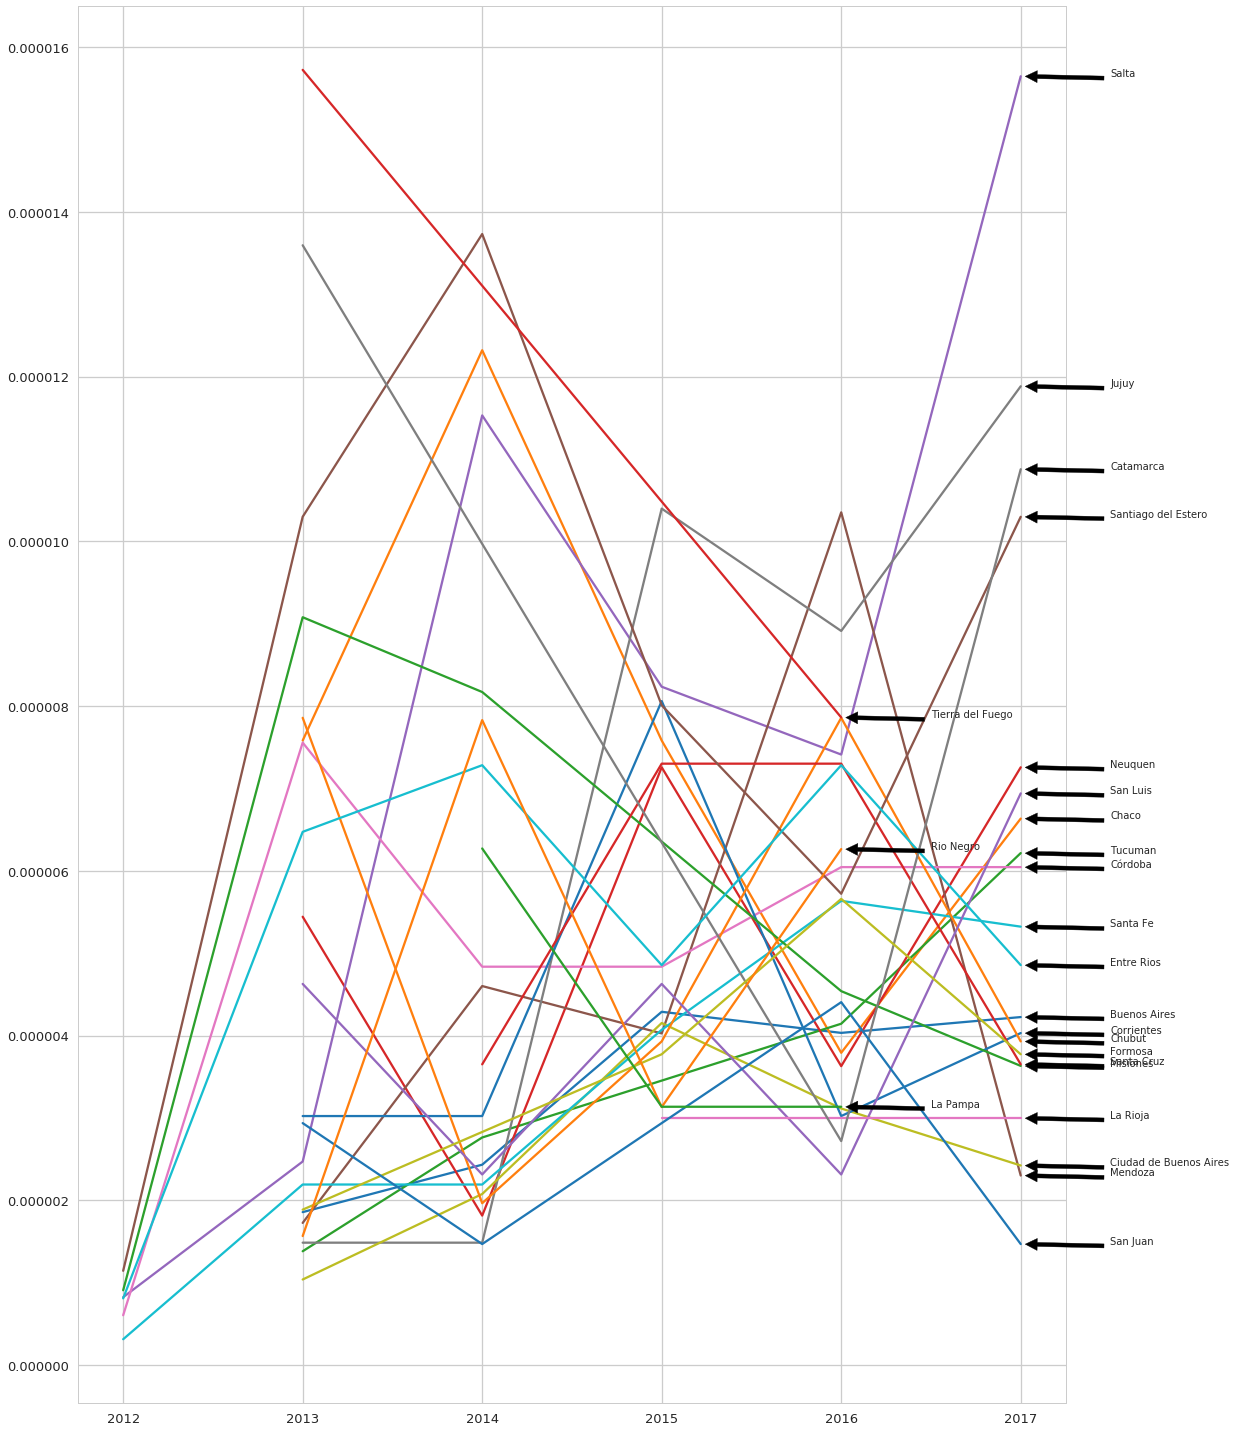

In [260]:
def data_prov(prov):
    prov_dataset = dataset_2.where((dataset_2.tipo_victima=='PRINCIPAL')&(dataset_2.lugar_hecho==prov))
    return prov_dataset.dropna()

provincias = dataset_2["lugar_hecho"].drop_duplicates().drop(193)
fig = plt.figure(figsize=(15,20))
for provincia in provincias:
    hab = censo2010.where(censo2010.provincia==provincia).dropna()["numero_habitantes"].get_values()[0]
    ax = fig.add_subplot(111)
    prov = data_prov(provincia)["fecha_hecho"].value_counts().to_dict()
    if 2018.0 in prov.keys():
        del prov[2018.0]
    list = sorted(prov.items())
    x,y = zip(*list)
    y = y/hab
    line, = ax.plot(x,y,'-')
    ax.annotate(provincia,xy=(x[len(x)-1],y[len(y)-1]),xytext=(x[len(x)-1]+0.5,y[len(y)-1]),arrowprops=dict(facecolor='black', shrink=0.05),)
    plt.tight_layout()

In [186]:
hab = censo2010.where(censo2010.provincia=="Córdoba").dropna()["numero_habitantes"]
hab.get_values()[0]


3308876.0

""Exploro sobre los tipos de homicidio

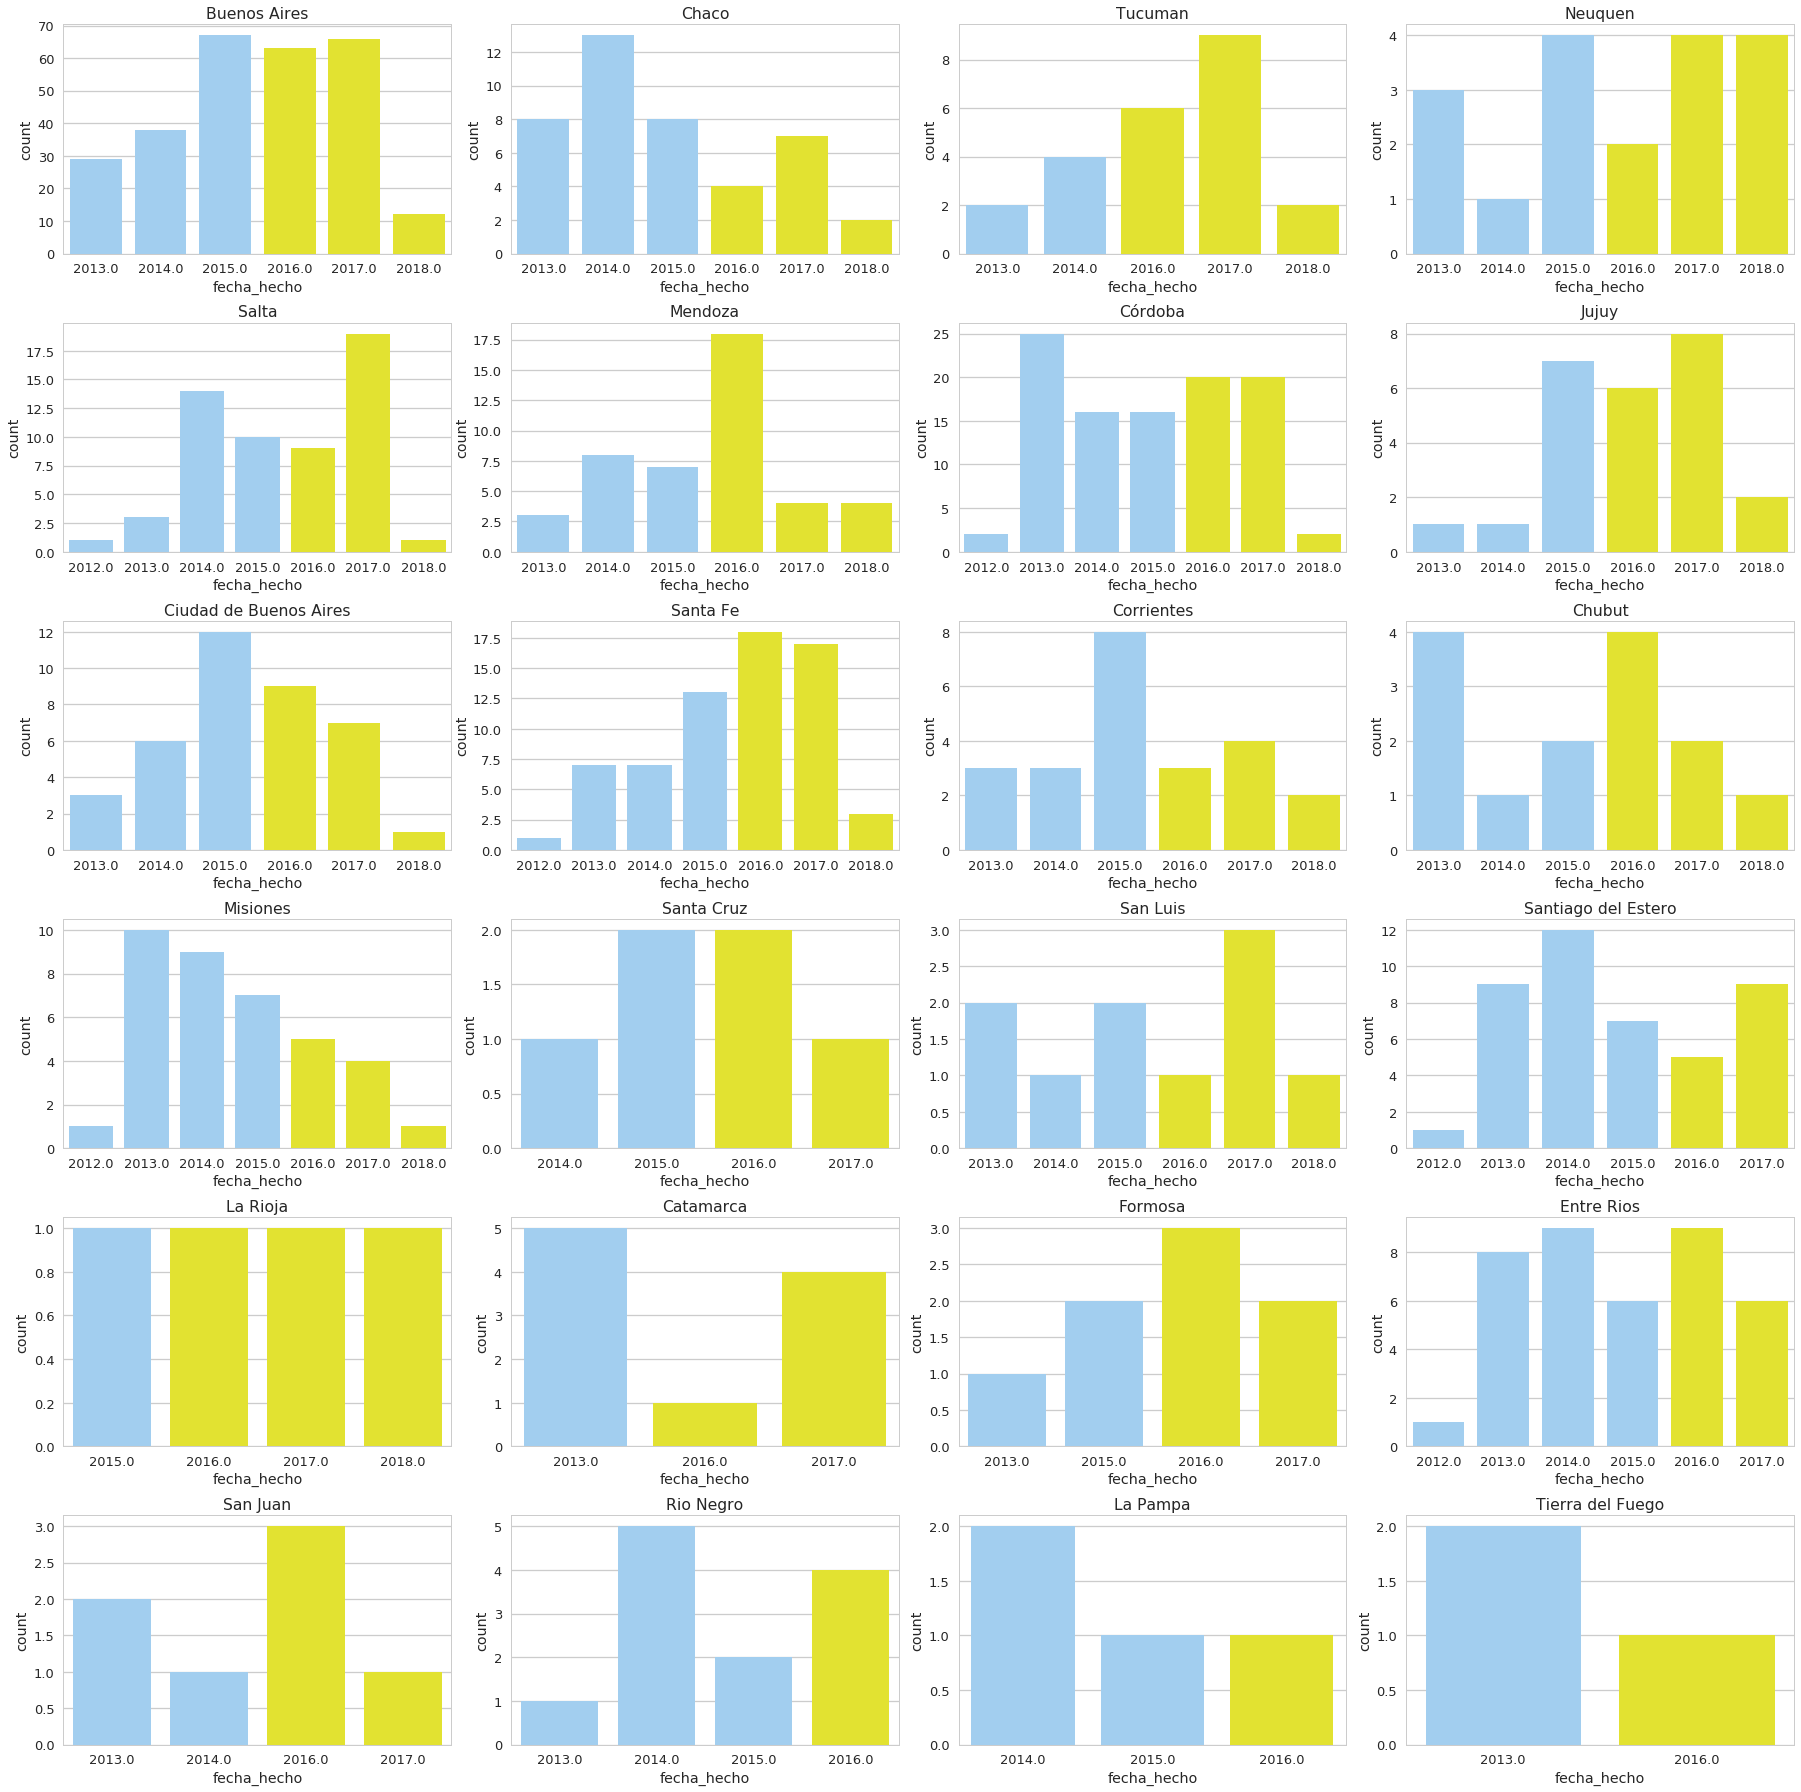

In [284]:

fig,axes = plt.subplots(6,4,figsize=(25,25))
i=0
j=0
for provincia in provincias:
    hab = censo2010.where(censo2010.provincia==provincia).dropna()["numero_habitantes"].get_values()[0]
    prov = data_prov(provincia)["fecha_hecho"].value_counts().to_dict()
    list = sorted(prov.items())
    x,y = zip(*list)
    y = y/hab
    #axes[i][j].plot(x,y,'-.')
    palette = []
    for k in x:
        if k <=2015.0:
            palette.append("light blue")
        else:
            palette.append("yellow")
    palette2 = sns.xkcd_palette(palette)
    sns.countplot(x="fecha_hecho",ax=axes[i][j],data=data_prov(provincia),palette=palette2)
    axes[i][j].set_title(provincia)
    
    if j==3:
        i = i + 1
        j = 0
    else:
        j = j + 1
plt.tight_layout()
    
        
    

In [20]:
# tengo que identificar la comisidad omisiva considerando cada caso por separado
# primero saco los que no tienen datos
mod_comisiva = dataset.where(dataset['modalidad_comisiva'] != 'Sin datos')
mod_comisiva = mod_comisiva.modalidad_comisiva.dropna()


'QUEMADURAS '

Text(0.5,1,'femicidios que involucraron quemaduras')

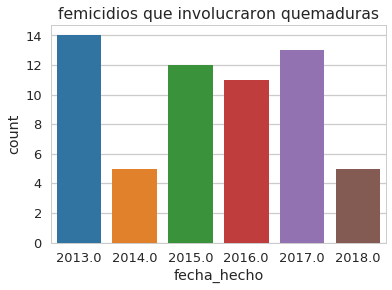

In [264]:
def solo_quemaduras(quem):
    if 'QUEMADURAS' in quem:
        quem = 'QUEMADURAS'
    else:
        quem = np.nan
    return quem
quemaduras = dataset_2.copy()
quemaduras = quemaduras.where(quemaduras.tipo_victima=="PRINCIPAL").dropna()
quemaduras["modalidad_comisiva"]=quemaduras["modalidad_comisiva"].apply(solo_quemaduras)
quemaduras = quemaduras.dropna()
quema = sns.countplot(x="fecha_hecho",data=quemaduras)
quema.set_title("femicidios que involucraron quemaduras")

Hubo un error en la consigna dada, ya que Wanda Taddei fue asesinada en 2010 y los datos de dataset comienzan en 2012, asi que no podremos hacer dicho análisis.

***Análisis por regiones de la Argentina***

In [383]:
noroeste = ["Jujuy","Salta","La Rioja","Tucuman","Catamarca","Santiago del Estero"]
noreste = ["Formosa","Chaco","Misiones","Corrientes","Entre Rios"]
cuyo = ["San Juan","San Luis","Mendoza"]
pampeana = ["Córdoba","Santa Fe","Buenos Aires","Ciudad de Buenos Aires","La Pampa"]
patagonica = ["Neuquen","Rio Negro","Chubut","Santa Cruz","Tierra del Fuego"]
def prov_a_region(prov):
    if prov in noroeste:
        return "Noroeste"
    elif prov in noreste:
        return "Noreste"
    elif prov in cuyo:
        return "Cuyo"
    elif prov in pampeana:
        return "Pampeana"
    elif prov in patagonica:
        return "Patagonica"
    else:
        return np.nan
data_region=dataset_2.copy()
data_region["lugar_hecho"] = data_region["lugar_hecho"].apply(prov_a_region).dropna()
data_region = data_region.filter(items=["lugar_hecho","fecha_hecho"]).dropna()
corr_dict = {}
for i in data_region.lugar_hecho.drop_duplicates().get_values():
     corr_dict[i] = data_region[data_region["lugar_hecho"]==i].fecha_hecho.value_counts()
data_matriz = pd.DataFrame(data=corr_dict)

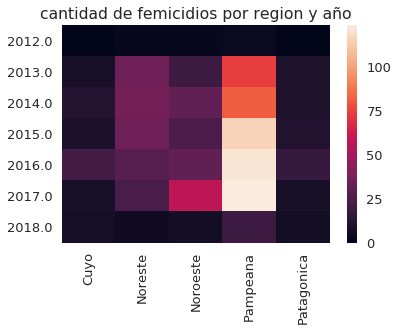

In [384]:
data_matriz = data_matriz.replace(np.nan,0)
ax = sns.heatmap(data=data_matriz)
ax.set_title("cantidad de femicidios por region y año")
plt.show()

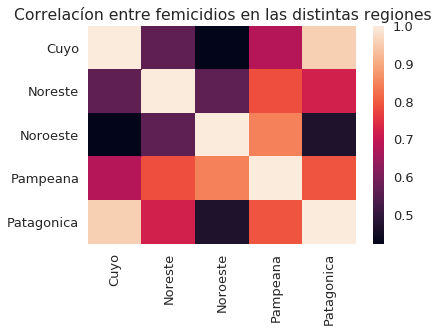

In [386]:
ax = sns.heatmap(data=data_matriz.corr())
ax.set_title("Correlacíon entre femicidios en las distintas regiones")
plt.show()